#Zadatak 1 - Predviđanje cijena kuća u Bostonu

U ovom zadatku cilj je izvršiti predikciju cijene prilikom kupovine kuće u Bostonu na bazi podataka iz 1970. godine.
Za potrebe vježbe koristiti će se historijski podaci, a oni uključuju informacije kao što je nivo kriminala u regiji,
lokalni porez, itd. Ciljne (eng. target) vrijednosti su izražene u hiljadama dolara.

a) Učitati The Boston Housing Price skup podataka. Skup podataka je dio Keras biblioteke te se može učitati
sljedećim kodom:

In [ ]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

b) Koji je oblik podataka za treniranje, a koji za testiranje? Koliko ima ukupno atributa (značajki)?

In [ ]:
print("Oblik podataka za treniranje:", train_data.shape)
print("Oblik ciljnih vrijednosti za treniranje:", train_targets.shape)
print("Oblik podataka za testiranje:", test_data.shape)
print("Oblik ciljnih vrijednosti za testiranje:", test_targets.shape)


Oblik podataka za treniranje: (404, 13)
Oblik ciljnih vrijednosti za treniranje: (404,)
Oblik podataka za testiranje: (102, 13)
Oblik ciljnih vrijednosti za testiranje: (102,)


Oblik podataka za treniranje je (404,13) što znači da imamo 404 primjera za treniranje, a svaki primjer 13 atributa. Oblik ciljnih vrijednosti za treniranje je (404,) što znači da imamo 404 ciljne vrijednosti za treniranje. Slični zaključci se mogu sprovesti i na podacima za testiranje.

c) Koji je opseg vrijednosti (min i max ) za svaki atribut u skupu podataka? A koji je opseg vrijednosti za ciljne
(eng. target) vrijednosti?

In [ ]:
import numpy as np

min_values = np.min(train_data,axis=0)
max_values = np.max(train_data, axis=0)

min_target = np.min(train_targets)
max_target = np.max(train_targets)

print("Opseg vrijednosti za svaki atribut u skupu podataka:")
for i in range(len(min_values)):
    print(f"Atribut {i+1}: Min={min_values[i]}, Max={max_values[i]}")

print("\nOpseg vrijednosti za ciljne vrijednosti:")
print(f"Min={min_target}, Max={max_target}")

Opseg vrijednosti za svaki atribut u skupu podataka:
Atribut 1: Min=0.00632, Max=88.9762
Atribut 2: Min=0.0, Max=100.0
Atribut 3: Min=0.46, Max=27.74
Atribut 4: Min=0.0, Max=1.0
Atribut 5: Min=0.385, Max=0.871
Atribut 6: Min=3.561, Max=8.725
Atribut 7: Min=2.9, Max=100.0
Atribut 8: Min=1.1296, Max=10.7103
Atribut 9: Min=1.0, Max=24.0
Atribut 10: Min=188.0, Max=711.0
Atribut 11: Min=12.6, Max=22.0
Atribut 12: Min=0.32, Max=396.9
Atribut 13: Min=1.73, Max=37.97

Opseg vrijednosti za ciljne vrijednosti:
Min=5.0, Max=50.0


Najmanja cijena kuće iznosi 5 hiljada dolara, dok najveća cijena kuće iznosi 50 000 dolara.

d) S obzirom da podaci zauzimaju široke spektre vrijednosti, izvršiti skaliranje korištenjem MinMaxScaler-a.
Obavezno povesti računa da se parametri scaler-a za skaliranje izračunaju nad trening skupom podataka, a
da se skaliranje izvrši i nad trening i nad test skupom;

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_data)
train_data_scaled = scaler.transform(train_data)
test_data_scaled = scaler.transform(test_data)

e) Napisati pomoćnu funkciju def model_mreze() koja će vraćati model mreže (return model) opisan u
nastavku. Model treba da ima 2 skrivena Dense sloja sa po 64 neurona sa relu aktivacijskim funkcijama.
Dimenzije ulaznog sloja odrediti na osnovu broja atributa skupa podataka. Treći, koji je i posljednji sloj, treba
imati samo jedan neuron i ne treba imati aktivacijsku funkciju;

In [ ]:
from keras import models
from keras import layers

def model_mreze(broj_atributa):
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(broj_atributa,)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  return model

model = model_mreze(train_data.shape[1])

f) Kompajlirati model da koristi mse funkciju gubitka, adam optimizator i mae metriku. S obzirom da su ciljne
vijednosti izražene u hiljadama dolara, metrika MAE govori koliko model griješi u hiljadama dolara. Na primjer,
ukoliko je vrijednost MAE = 4.2, to znači da predviđanja modela odstupaju u prosjeku za $4200;

In [ ]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                896       
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5121 (20.00 KB)
Trainable params: 5121 (20.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


g) Izvršiti treniranje modela na 100 epoha, sa veličinom batch-a jednakoj 1. Koristiti 10% trening skupa za validaciju. Kolika je postignuta vrijednost funkcije gubitka na kraju treniranja, a koliko je vrijednosti metrike MAE? Grafički prikazati.

Epoch 1/100
363/363 [==============================] - 2s 2ms/step - loss: 204.9676 - mae: 10.7995 - val_loss: 36.3508 - val_mae: 4.9131
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 56.6953 - mae: 5.2882 - val_loss: 21.9839 - val_mae: 3.5609
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 39.9995 - mae: 4.4513 - val_loss: 22.2996 - val_mae: 3.6658
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 31.2146 - mae: 3.8915 - val_loss: 24.9919 - val_mae: 3.7160
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 27.0725 - mae: 3.6322 - val_loss: 22.9140 - val_mae: 3.4528
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 24.5008 - mae: 3.4921 - val_loss: 25.3672 - val_mae: 3.8803
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 22.8349 - mae: 3.3789 - val_loss: 22.1379 - val_mae: 3.4579
Epoch 8/100
363/363 [==============================] 

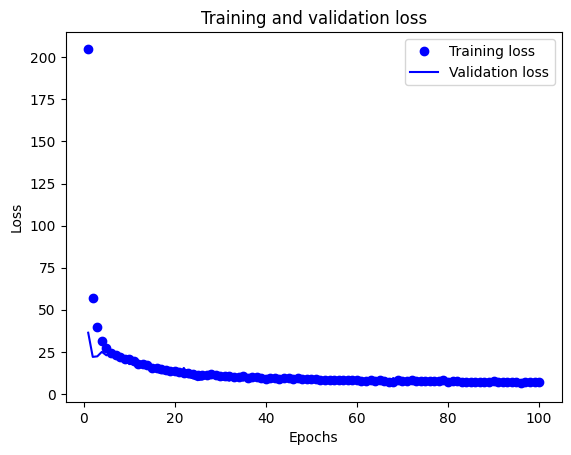

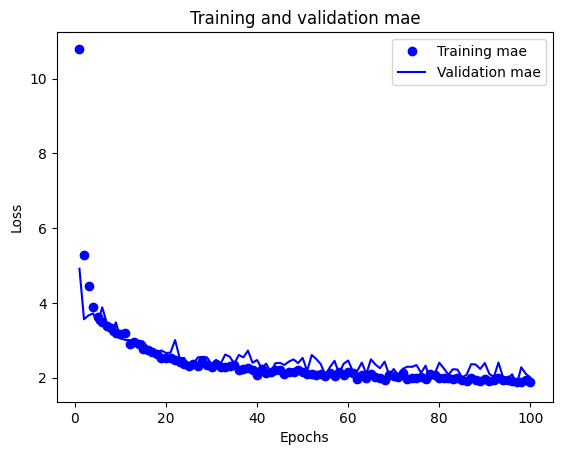

In [ ]:
history = model.fit(train_data_scaled, train_targets, epochs=100, batch_size=1, validation_split=0.1)

import math
import matplotlib.pyplot as plt
acc = history.history['mae']
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.clf()
acc_values = history.history['mae']
val_acc_values = history.history['val_mae']
plt.plot(epochs, acc_values, 'bo', label='Training mae')
plt.plot(epochs, val_acc_values, 'b', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

h) U prethodnom grafičkom prikazu problem predstavlja skala i visoka varijansa nad validacijskim skupom podataka. Iz tog razloga je korisno prikazati usrednjene vrijednosti i zanemariti prvih 10 uzoraka radi visoke skale u početnim epohama. Ovakav prikaz nad validacijskim skupom podataka se može postići sljedećim kodom:

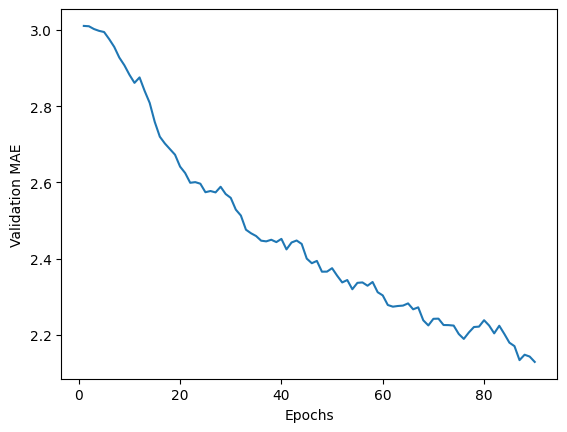

In [ ]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
       previous = smoothed_points[-1]
       smoothed_points.append(previous * factor + point * (1 - factor))
    else:
        smoothed_points.append(point)
  return smoothed_points
mae_history = history.history['val_mae']

smooth_mae_history = smooth_curve(mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


i) Ponovo definisati model i istrenirati ga na 500 epoha. Ostale parametre ostaviti nepromijenjenim. Izvršiti
grafički prikaz usrednjenih vrijednosti kao u prethodnom zadatku. Uporediti ova dva grafička prikaza. Šta se
može zaključiti iz ovih grafika?

Epoch 1/500
363/363 [==============================] - 2s 4ms/step - loss: 194.7046 - mae: 10.0163 - val_loss: 32.4744 - val_mae: 4.6821
Epoch 2/500
363/363 [==============================] - 1s 3ms/step - loss: 58.7140 - mae: 5.3038 - val_loss: 21.9674 - val_mae: 3.5671
Epoch 3/500
363/363 [==============================] - 1s 2ms/step - loss: 43.4474 - mae: 4.6376 - val_loss: 21.8198 - val_mae: 3.6380
Epoch 4/500
363/363 [==============================] - 1s 2ms/step - loss: 33.0489 - mae: 4.0170 - val_loss: 25.6971 - val_mae: 3.9111
Epoch 5/500
363/363 [==============================] - 1s 2ms/step - loss: 27.6651 - mae: 3.7947 - val_loss: 23.8809 - val_mae: 3.5810
Epoch 6/500
363/363 [==============================] - 1s 3ms/step - loss: 24.0618 - mae: 3.5078 - val_loss: 22.5464 - val_mae: 3.4510
Epoch 7/500
363/363 [==============================] - 1s 2ms/step - loss: 23.1853 - mae: 3.4114 - val_loss: 23.2082 - val_mae: 3.3606
Epoch 8/500
363/363 [==============================] 

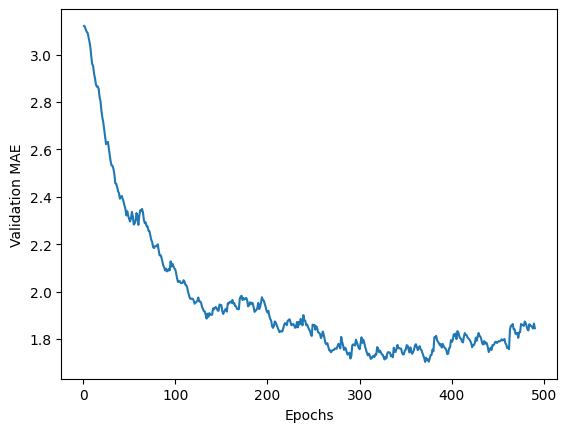

In [ ]:
model = model_mreze(train_data.shape[1])
model.compile(optimizer='adam',loss='mse',metrics=['mae'])
history = model.fit(train_data_scaled, train_targets, epochs=500, batch_size=1, validation_split=0.1)

mae_history = history.history['val_mae']
smooth_mae_history = smooth_curve(mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


j) Izvršiti evaluaciju modela nad testnim skupom podataka. Koja je postignuta vrijednost funkcije gubitka, a
koja vrijednost metrike MAE? Koliko prosječno u dolarima griješi model u svojim predikcijama?

In [ ]:
results = model.evaluate(test_data,test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 5100814.5000 - mae: 1906.2153


Vrijednost funkcije gubitka (MSE) na testnom skupu podataka je 5100814.5000, a vrijednost metrike MAE (mean absolute error) je 1906.2153.

Model u prosjeku griješi za otprilike 1906.22 dolara u svojim predikcijama.